# **Trabajo Graficas de Impacto**
## **OBJETIVO:** Se debe crear una grafica de barras y una grafica de torta sobre la cantidad de vulnerabilidades que tienen un impacto Critico, Alto, Medio o Bajo 

### John Sebastián Galindo Hernández
### Ciencia de datos 702
### Universidad de cundinamarca extensión Facatativá
### 16 / Abril / 2024

------
#### Para este trabajo se decide usar Mongo Atlas como base de datos debido a que allí fue subida la recoleccióñ de información sobre los CVE por Software

### 1. Importar librerias necesesarias

Entre estas se encuentran:
* **pymongo** Permite traer la información de los cve por software cargados en la base de datos 'DataScience' en Mongo Atlas
* **matplotlib** Permite crear las graficas de barras horizontales y de torta
* **json** se usa para mostrar con mayor claridad la información que es consultada de mongo atlas *(Usado para testing)*
* **numpy** Permite tener una amplia colección de funciones matematicas *(Actualmente no usado en el codigo)*

In [1]:
import pymongo #Allows to get information about cve per software in the database called 'DataScience' from Mongo Atlas
import matplotlib.pyplot as plt # Allows to create the horizontal bars and pie charts
import json # Used for show with indentation the data requested from mongo atlas
import numpy # Allows to have an wide mathematical function collection (Still not used in the current code) 

### 2. Funcion para consultar la información de cada software que esta guardado en la base de datos

Esta función realiza la consulta de la informacion guardada en la base de datos llamada 'DataSciense' en mongo atlas. en esta se utiliza una cadena de conexión para acceder a la instancia de monogo atlas **mongo_uri**, despues en **db** se guarda la base de datos a la que se quiere acceder, despues haciendo uso de db se guarda la colección que se va a usar en **collection**.
Para la consulta se especifica un filtro que trae solo los documentos donde hay una lista de vulnerabilidades (cve) en **filter**, depues se hace la consulta y se guardan los documentos obtenidos en **swList**, por ultimo se mapea el id para evitar errores con el tipo ObjectID y se retorna la lista mapeada **swMappedList**

Esta funcion no contiene parametros

In [51]:
def GetSWInfo():
    """
    Obtain data about vulnerabilities per software stored in mongo atlas 
    
    Args: none

    Returns:
        swMappedList: List with all softwares with vulnerabilities, the list has the id property mapped in order to change 
        type ObjectID to String
    """
    mongo_uri = "THE MONGO URI FOR CONNECT (NOT INCLUDED IN THE EXTERNAL FILE)"
    client = pymongo.MongoClient(mongo_uri)
    
    # Selecciona la base de datos
    db = client["DataScience"]
    
    # Selecciona la colección
    coleccion = db["SoftwareCVE"]

    filter = {"cveList": {"$not": {"$type": 2}}}
    swList = coleccion.find(filter)
    swMappedList = []
    for sw in swList:
        sw["_id"] = str(sw["_id"])
        swMappedList.append(sw)
    return swMappedList

### 3. Funcion para crear los parametros de la grafica y ejecutar los metodos de realizar las graficas

Esta función toma la información que esta en la lista de softwares para hacer el conteo mediante de cuantos softwares registrados tienen una criticidad, baja, media, alta o critica, con el fin de generar un grafico de barras para comparar la cantidad presentada de cada una como tambien un grafico de pastel para comparar los porcentajes de cada una.

In [3]:
def ImpactCharts(swList):
    """
    Analize data to create variables Critical, High, Medium, Low in base to the criticity presented in the CVEs, 
    after that, the function creates horizontal bar and pie charts
    
    Args: 
        swList: Is the list with the software data and its vulnerabilities registered

    Returns:
        None
    """
    high = 0
    medium = 0
    low = 0
    critical = 0
    for sw in swList:
        for cve in sw["cveList"]:
            if 'baseSeverity' in cve['metrics']:
                baseSeverity = cve['metrics']['baseSeverity']
            else:
                continue
            if(baseSeverity == "CRITICAL"):
                critical +=  1
            elif(baseSeverity == "HIGH"):
                high += 1
            elif(baseSeverity == "MEDIUM"):
                medium += 1
            elif(baseSeverity == "LOW"):
                low += 1
                
    categories = ['Critial','High', 'Medium', 'Low']
    values = [critical, high, medium, low]
    colors = ["#111111","#c90e0e","#ed6d0c","#edc40c"]

    #Call functions for graphing the data
    GraphBarHChart(categories, values, colors)
    GraphPieChart(categories,values,colors)
    plt.show()
    
    

### 4. Funcion para hacer la grafica de barras horizontales

Esta función recibe la información las 4 categrias que van a ser barras en el grafico (Critical, High, Medium, Low), en base a esto y a los valores de cada uno pasados a través de la lista **values** se le pasan los parametros a las funciones de matplotlib para que cree una figura y el grafico dentro de ella, además se coloca un titulo y los subtitulos para cada eje.

In [49]:
def GraphBarHChart(categories, values, colors):
    """
    In base to data passed via parameters this function creates a horizontal bar chart 
    about cve criticity in all softwares on a specified pc 
    
    Args: 
        categories: Is a list with the considered types of criticity
        values: Is a list with the data for each category
        colors: Is a list with a hexadecimal colors for each category

    Returns:
        None
    """
    
    plt.figure(figsize=(12, 5))
    plt.barh(categories,values, color=colors, zorder = 2)
    plt.grid(True, zorder = 1)
    
    for i, v in enumerate(values):
        plt.text(v + 5 , i, str(v), 
            color = '#1f6b46', fontweight = 'bold')
        
    # Tittles and tags 
    plt.title('Impact by vulnerabilities criticity')
    plt.ylabel('Criticity')
    plt.xlabel('Impact')
    

### 5. Funcion para hacer la grafica de torta

Esta función recibe la información las 4 categrias que van a ser porcentajes para el grafico (Critical, High, Medium, Low), en base a esto y a los valores de cada uno pasados a través de la lista **values** se le pasan los parametros a las funciones de matplotlib para que cree una figura y el grafico dentro de ella, además se coloca un titulo y se aclara de que categoria es color asignado y cuanto porcentaje tiene.

In [5]:
def GraphPieChart(categories,values,colors):
    """
    In base to data passed via parameters this function creates a pie chart 
    about cve criticity in all softwares on a specified pc 
    
    Args: 
        categories: Is a list with the considered types of criticity
        values: Is a list with the data for each category
        colors: Is a list with a hexadecimal colors for each category

    Returns:
        None
    """
    fig, ax = plt.subplots()
    explode = (0,0.1,0,0)
    # Getting variables provided by ax.pie for make a better explanation of the categories and their colors
    wedges, texts, autotexts = ax.pie(values,shadow = True,explode = explode, labels=categories, colors = colors, autopct='%1.1f%%', textprops = dict(color = "w"))

    # Tittles and tags 
    ax.legend(wedges, categories,
          title="Categories",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
    ax.set_title("CVE Impact in pie chart")
    plt.setp(autotexts, size=12, weight="bold")

### 6. Llamar a las funciones

In [6]:
# Obtaining the list of softwares with at least one vulnerability
swList = GetSWInfo()

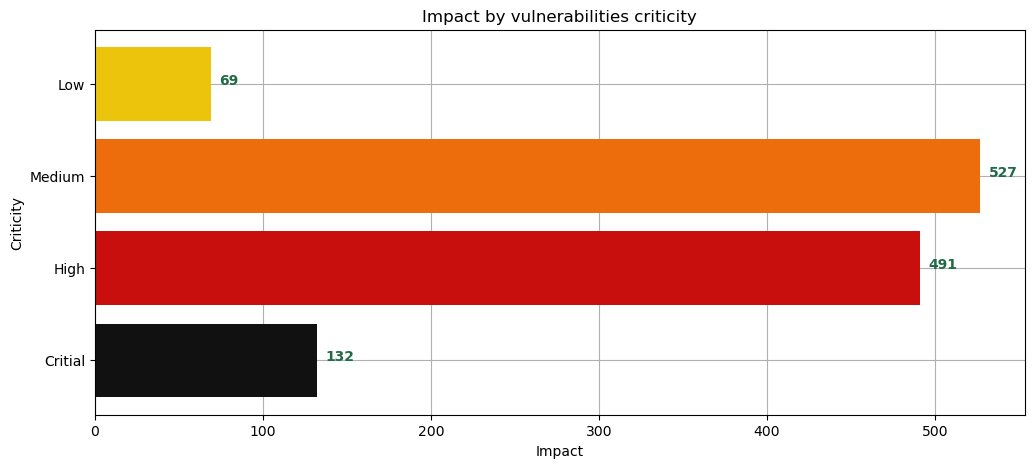

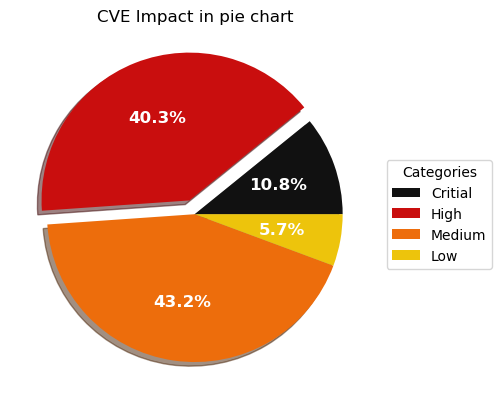

In [50]:
# Call the fuction for making the charts
ImpactCharts(swList)